### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

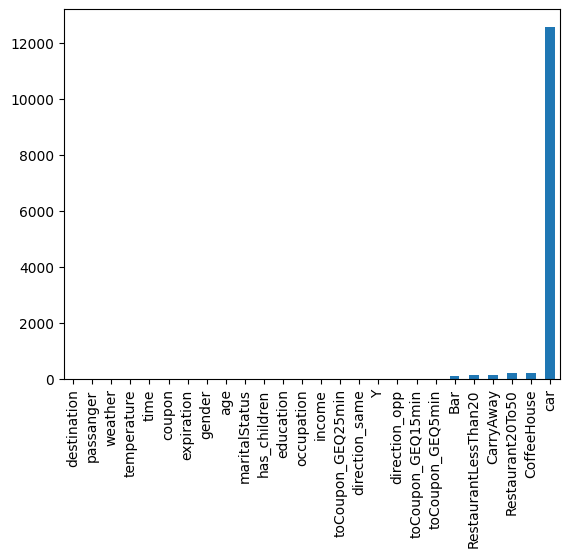

In [9]:
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()

Columns with missing values are:


*   Bar
*   RestaurantLessThan20
*   CarryAway
*   Restaurant20To50
*   CoffeeHouse
*   Car



In [10]:
df_carmissing = data.loc[data['car'].isnull()]
df_carmissing['car']

,car
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
12679,NaN
12680,NaN
12681,NaN
12682,NaN


In [11]:
df_Bar_missing = data.loc[data['Bar'].isnull()]
df_Bar_missing['Bar']

,Bar
517,NaN
518,NaN
519,NaN
520,NaN
521,NaN
...,...
12168,NaN
12169,NaN
12170,NaN
12171,NaN


In [12]:
df_CarryAway_missing = data.loc[data['CarryAway'].isnull()]
df_CarryAway_missing['CarryAway']

,CarryAway
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8644,NaN
8645,NaN
8646,NaN
8647,NaN


In [13]:
df_CoffeHouse_missing = data.loc[data['CoffeeHouse'].isnull()]
df_CoffeHouse_missing['CoffeeHouse']

,CoffeeHouse
495,NaN
496,NaN
497,NaN
498,NaN
499,NaN
...,...
12409,NaN
12410,NaN
12411,NaN
12412,NaN


3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
#drop the 'car' column because it has too many missing values
df1 = data
df1 = data.drop('car', axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [15]:
#replace the missing values in the remaining columns with "never"
df2 = df1.fillna("never")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [16]:
#save the cleaned dataframe
df_coupon = df2

4. What proportion of the total observations chose to accept the coupon?



In [17]:
accepted = df_coupon['Y'][df_coupon['Y'] == 1].count()
total = df_coupon.shape[0]
print("The proportion of total observations that accepted the coupon is", accepted/total)

The proportion of total observations that accepted the coupon is 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

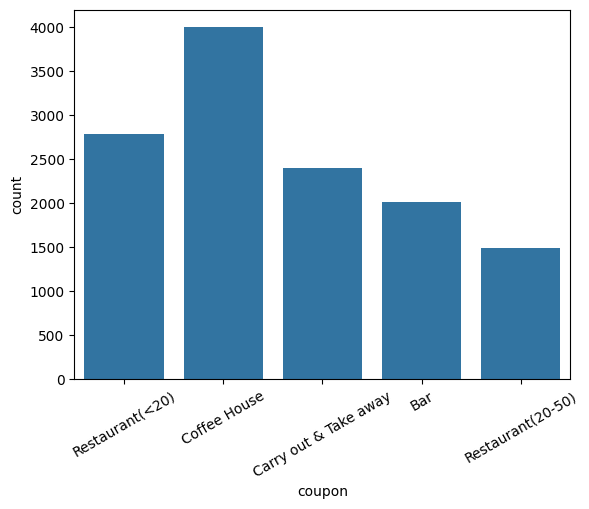

In [18]:
sns.countplot(x='coupon', data=df_coupon)
plt.xticks(rotation=30)
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

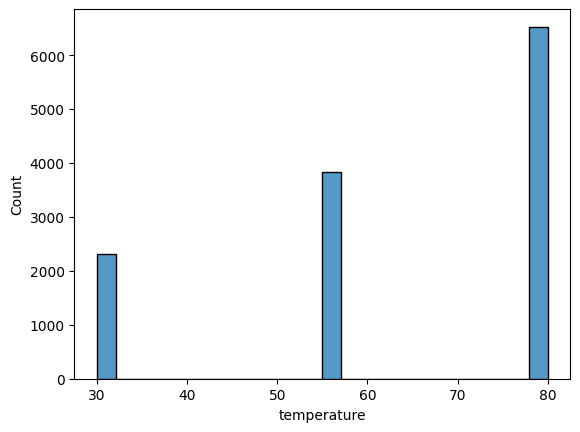

In [19]:
sns.histplot(x='temperature', data=df_coupon)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
df_barcoupons = df_coupon[df_coupon['coupon']=="Bar"]
df_barcoupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [21]:
df_bar_accepted = df_barcoupons['Y'][df_barcoupons['Y'] == 1]
bar_total = df_barcoupons.shape[0]
print("The proportion of bar observations that accepted the bar coupon is", df_bar_accepted.count()/bar_total)

The proportion of bar observations that accepted the bar coupon is 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [22]:
# show the possible values for the 'Bar' column
df_bar_values = df_barcoupons['Bar'].value_counts()
print(df_bar_values)

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64


In [23]:
# store <= 3 and > 3 in separate variables
bar_3orless = ['never', 'less1', '1~3']
bar_morethan3 = ['4~8', 'gt8']

In [24]:
# find the total number of coupons accepted for each filter
a = df_barcoupons.query('Bar in @bar_3orless and Y == 1')
accepted_3orless = a.shape[0]

b = df_barcoupons.query('Bar in @bar_morethan3 and Y == 1')
accepted_morethan3 = b.shape[0]

print(accepted_3orless, accepted_morethan3)

674 153


In [25]:
# calculate acceptance rate for each filter
print("The acceptance rate for those who went to a bar 3 or fewer times is", accepted_3orless/bar_total)
print("The acceptance rate for those who went to a bar more than 3 times is", accepted_morethan3/bar_total)

The acceptance rate for those who went to a bar 3 or fewer times is 0.3341596430342092
The acceptance rate for those who went to a bar more than 3 times is 0.07585523054040655


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
bar_morethan1 = ['1~3','4~8', 'gt8']

In [27]:
df_age_values = df_barcoupons['age'].value_counts()
print(df_age_values)

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64


In [28]:
c = df_barcoupons.query('Bar in @bar_morethan1 and Y == 1 and age != "21" and age != "below21"')
accepted_morethan1_over25 = c.shape[0]
accepted_morethan1_over25

292

In [29]:
print("The acceptance rate for those who went to a bar more than once a month and are over the age of 25 is", accepted_morethan1_over25/bar_total)

The acceptance rate for those who went to a bar more than once a month and are over the age of 25 is 0.14476945959345563


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [30]:
df_barcoupons['passanger'].value_counts()

,count
passanger,
Alone,1200
Friend(s),337
Partner,274
Kid(s),206


In [31]:
df_barcoupons['occupation'].value_counts()

,count
occupation,
Unemployed,301
Student,251
Computer & Mathematical,232
Sales & Related,178
Education&Training&Library,140
Management,119
Office & Administrative Support,105
Arts Design Entertainment Sports & Media,100
Business & Financial,89


In [32]:
d = df_barcoupons.query('Bar in @bar_morethan1 and Y==1 and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')
accepted_morethan1_nokids_nofff = d.shape[0]
accepted_morethan1_nokids_nofff

393

In [33]:
print("The acceptance rate for those who went to a bar more than once a month, did not have kids as passengers, and do not have occupations in farming, fishing or forestry is", accepted_morethan1_nokids_nofff/bar_total)

The acceptance rate for those who went to a bar more than once a month, did not have kids as passengers, and do not have occupations in farming, fishing or forestry is 0.19484382746653445


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [34]:
df_barcoupons['income'].value_counts()

,count
income,
$25000 - $37499,318
$100000 or More,291
$12500 - $24999,288
$37500 - $49999,267
$50000 - $62499,262
Less than $12500,165
$75000 - $87499,151
$87500 - $99999,145
$62500 - $74999,130


In [35]:
age_under30 = ['21', '26', 'below21']
restaurants_over4 = ['4~8', 'gt8']
income_under50 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

In [36]:
bar_accepted_1 = df_barcoupons.query('Bar in @bar_morethan1 and Y==1 and passanger != "Kid(s)" and maritalStatus != "widowed"')
bar_accepted_2 = df_barcoupons.query('Bar in @bar_morethan1 and Y==1 and age in @age_under30')
bar_accepted_3 = df_barcoupons.query('RestaurantLessThan20 in @restaurants_over4 and Y==1 and income in @income_under50')

In [37]:
print(bar_accepted_1.shape[0]/bar_total)
print(bar_accepted_2.shape[0]/bar_total)
print(bar_accepted_3.shape[0]/bar_total)

0.19484382746653445
0.12345066931085771
0.07734258800198314


In [38]:
filtered_data = {'Acceptance Rate': [bar_accepted_1.shape[0]/bar_total, bar_accepted_2.shape[0]/bar_total, bar_accepted_3.shape[0]/bar_total]}
df_bar_accepted_3 = pd.DataFrame(filtered_data, index=['Bar > 1/mo, no kids, not widowed', 'Bar > 1/mo, age < 30', 'Cheap restaurants > 4/mo, income < $50k'])
df_bar_accepted_3.index.name = "Driver Type"
df_bar_accepted_3

,Acceptance Rate
Driver Type,
"Bar > 1/mo, no kids, not widowed",0.194844
"Bar > 1/mo, age < 30",0.123451
"Cheap restaurants > 4/mo, income < $50k",0.077343


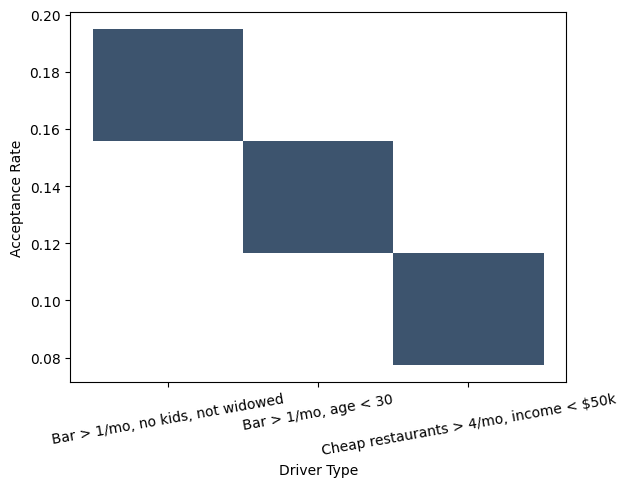

In [39]:
sns.histplot(x='Driver Type', y='Acceptance Rate', data = df_bar_accepted_3)
plt.xticks(rotation=10)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Higher acceptance rates for bar coupons tend to be correlated with drivers who:


*   Go to bars more than once per month, but 3 or fewer times per month
*   Are below the age of 30
*   Have no passengers as kids

Thus, acceptance rate of the bar coupon is higher within a specific demographic: young drivers below the age of 30, who go to bars relatively infrequently per month, and do not have passengers as kids.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  